Arkael Kernizan <br>
12/03/24

### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Read Files

In [5]:
#kaggle
data =  pd.read_csv("C:/Users/arkke/Documents/Data_Science/Final Project/streaming_viewership_data.csv")
#NaturalEarthData.com
world = gpd.read_file("C:/Users/arkke/Downloads/ne_110m_admin_0_countries")

In [6]:
data.shape

(6214, 16)

### Clean Data

In [8]:
data = data.drop(['Device_ID', 'Subscription_Status', 'Languages', 'Location'], axis = 1)
data = data.rename(columns = {'Duration_Watched (minutes)': 'Duration_Watched'})
data.columns = [x.lower() for x in data.columns]

In [9]:
data.shape

(6214, 12)

### Question 1: How does the device type and playback quality affect the duration watched of a show? 

For this problem, there are 15 combinations of a device types and playback quality. Create a dataframe with columns: duration_watched, device_type, and playback_quality. Group by device_type and playback_quality, then take the mean time watched for each pairing.

In [13]:
watchShows = data[['duration_watched', 'device_type', 'playback_quality']]

In [14]:
watchShows = watchShows.rename(columns = {'duration_watched': 'time', 'device_type': 'device', 'playback_quality': 'quality'})

In [15]:
watchShows.head()

,time,device,quality
0,90.044525,Smartphone,4K
1,68.973479,Desktop,SD
2,42.511343,Tablet,HD
3,53.316660,Laptop,SD
4,69.437786,Laptop,HD


In [16]:
# group watchShows by the deivice type and the quality, then takes the mean time 
# unstack to rearange data  
meanTimeDeviceQuality = watchShows.groupby(['device', 'quality'])['time'].mean().unstack()

In [17]:
meanTimeDeviceQuality

quality,4K,HD,SD
device,,,
Desktop,60.363239,59.312821,62.087965
Laptop,59.961413,61.232622,61.947709
Smart TV,59.623117,58.665985,61.412864
Smartphone,59.971346,60.458580,62.552065
Tablet,58.054309,58.784977,61.359375


### Plot

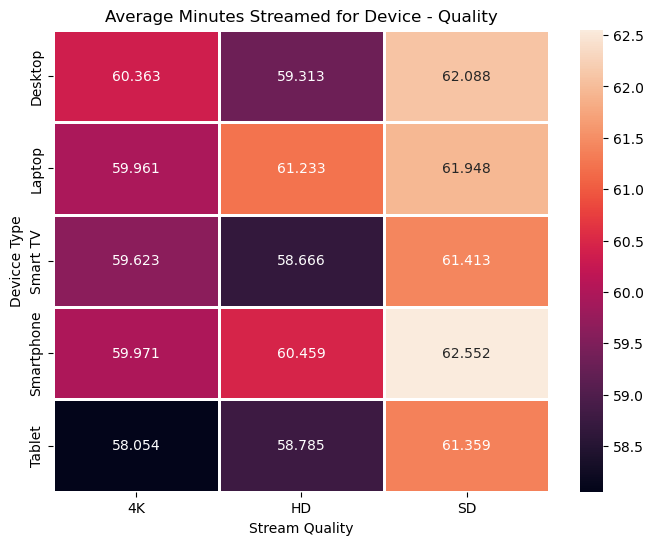

In [19]:
# plot heat map
plt.figure(figsize=(8, 6))
sns.heatmap(meanTimeDeviceQuality, annot = True, fmt=".3f", linewidths = 2)
plt.title('Average Minutes Streamed for Device - Quality')
plt.xlabel('Stream Quality')
plt.ylabel('Devicce Type')
plt.show()

In [20]:
print(f'Average minutes streamed for each quality:\n\nSD: {meanTimeDeviceQuality['SD'].mean()}\nHD: {meanTimeDeviceQuality['HD'].mean()}\n4K: {meanTimeDeviceQuality['4K'].mean()}')

Average minutes streamed for each quality:

SD: 61.871995752370836
HD: 59.69099714082314
4K: 59.59468456818239


The heatmap above shows the minutes watch for each device quality combination. Overall, most people who are streaming shows or movies spend the most time watching in SD quality with a leading average of 61.87 minutes streamed on all devices. From the data, it is shown that the majority of time spent streaming happens on a smartphone or a desktop in SD. The least amount of time streaming is spent on tablets in 4K quality. 

### Question 2: What is the most popular type of genre per country?

For this problem, a list of countries will be imported from GeoPandas. Because GeoPandas supports 177 countries and the orginal df contains more, remove any countires that are not within GeoPandas' list. From there, count the max genre that is found per country and plot on GeoPandas world map. 

In [24]:
countries = data[['country', 'genre']]

In [25]:
countries.head()

,country,genre
0,Sudan,Sci-Fi
1,Cuba,Comedy
2,Japan,Comedy
3,Lao People's Democratic Republic,Documentary
4,Bangladesh,Action


In [26]:
#list of 177 countries GeoPandas supports
geo_countries = set(world['NAME'])

# this will keep countries that are in GeoPandas package
# make a copy to avoid errors
geoCountries = countries[countries['country'].isin(geo_countries)].copy()
geoCountries = geoCountries.sort_values(by='country')
geoCountries

,country,genre
5642,Afghanistan,Documentary
1092,Afghanistan,Drama
5022,Afghanistan,Documentary
1691,Afghanistan,Thriller
5280,Afghanistan,Drama
...,...,...
2761,Zimbabwe,Thriller
606,Zimbabwe,Action
4730,Zimbabwe,Drama
5683,Zimbabwe,Thriller


First line groups by country and genre, then count the number of instances for each pair. Group by countries and select the index of highest count, add to new df. 

In [29]:
# group by country and genre, add count
groupCountries = geoCountries.groupby(['country', 'genre']).size().reset_index(name = 'count')
# find max count index, add to df
countryGenre = groupCountries.loc[groupCountries.groupby('country')['count'].idxmax()]

In [30]:
countryGenre

,country,genre,count
3,Afghanistan,Drama,5
10,Albania,Sci-Fi,6
15,Algeria,Drama,6
23,Angola,Thriller,8
29,Argentina,Thriller,6
...,...,...,...
863,Venezuela,Thriller,6
865,Vietnam,Comedy,7
873,Yemen,Drama,9
877,Zambia,Comedy,7


### Plot
help from ChatGPT

Text(0.5, 1.0, 'Top Streamed Genre Per Country')

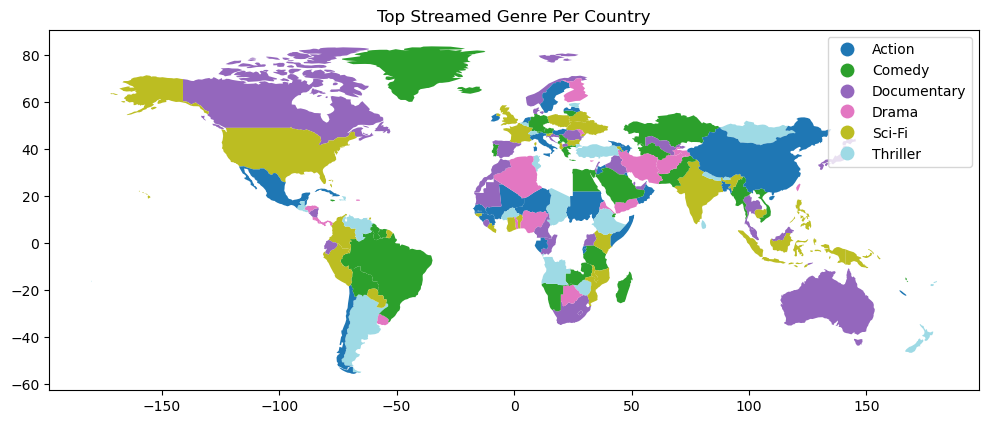

In [32]:
# .merge() left joins the Geopandas Name column with my country column
world = world.merge(countryGenre, left_on = 'NAME', right_on = 'country', how = 'left')
world.plot(column = 'genre', legend = True, figsize = (12, 8), cmap = 'tab20')
plt.title('Top Streamed Genre Per Country')